In [1]:
pip install bagpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lz4

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from bagpy import bagreader
b = bagreader("/home/anastasiaef/Downloads/scene.bag")

print(b.topic_table)

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


Python older than 3.7 detected. 


In [2]:
import pandas as pd
data = pd.read_csv("/home/anastasiaef/Downloads/state.csv")
data.head(10)

,%time,field.header.seq,field.header.stamp,field.header.frame_id,field.info.header.seq,field.info.header.stamp,field.info.header.frame_id,field.info.vehid,field.info.type,field.info.msg_ver,...,field.direction,field.weight,field.correction.x,field.correction.y,field.correction.z,field.reason.reason,field.reason.point.x,field.reason.point.y,field.reason.point.z,field.reason.state
0,1687475309246809836,2209146,1687475309243326902,NaN,0,0,NaN,1007002,NaN,NaN,...,1,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
1,1687475309262238808,2209147,1687475309259879112,NaN,0,0,NaN,1007002,NaN,NaN,...,1,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
2,1687475309276065193,2209148,1687475309272850990,NaN,0,0,NaN,1007002,NaN,NaN,...,1,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
3,1687475309294908716,2209149,1687475309292689085,NaN,0,0,NaN,1007002,NaN,NaN,...,1,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
4,1687475309309610537,2209150,1687475309306243896,NaN,0,0,NaN,1007002,NaN,NaN,...,1,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
5,1687475309325781347,2209151,1687475309322439908,NaN,0,0,NaN,1007002,NaN,NaN,...,1,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
6,1687475309349138403,2209152,1687475309343530893,NaN,0,0,NaN,1007002,NaN,NaN,...,1,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
7,1687475309359392370,2209153,1687475309356064081,NaN,0,0,NaN,1007002,NaN,NaN,...,1,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
8,1687475309379891500,2209154,1687475309376991033,NaN,0,0,NaN,1007002,NaN,NaN,...,1,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
9,1687475309396388932,2209155,1687475309392787933,NaN,0,0,NaN,1007002,NaN,NaN,...,1,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN


In [64]:
from pandas import *
Sp=data['field.speed'].tolist()
T=data['%time'].tolist()

In [95]:
i=0
j=1
St=[]
S=[]
while (i<len(Sp)-1):
    if (Sp[i]<2.2) and (Sp[i]>0):
        state[i]=0
    else:
        state[i]=1
    i+=1
i=0
stops=0
while (i<len(Sp)-1):
    if (state[i]==1) and (state[j]==0):
        St.append(T[j])
        stops+=1
    i+=1
    j+=1
print(St)
print(stops)

[1687475316543350992, 1687475322376501559, 1687475394296654320, 1687475441296417897]
4


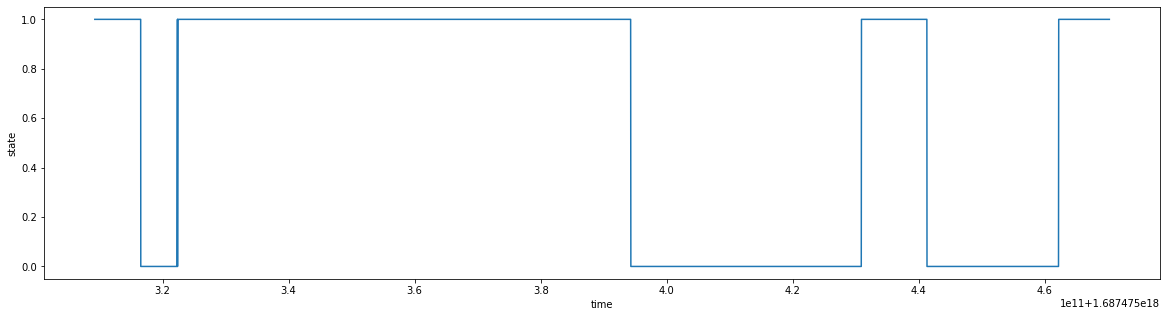

In [96]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(20, 5))
time=data['%time']
plt.plot(time,state) 
plt.xlabel('time')
plt.ylabel('state')
plt.show()

In [98]:
i=0
j=1
St=[]
S=[]
while (i<len(Sp)-1):
    if (Sp[i]<4):
        state[i]=0
    else:
        state[i]=1
    i+=1

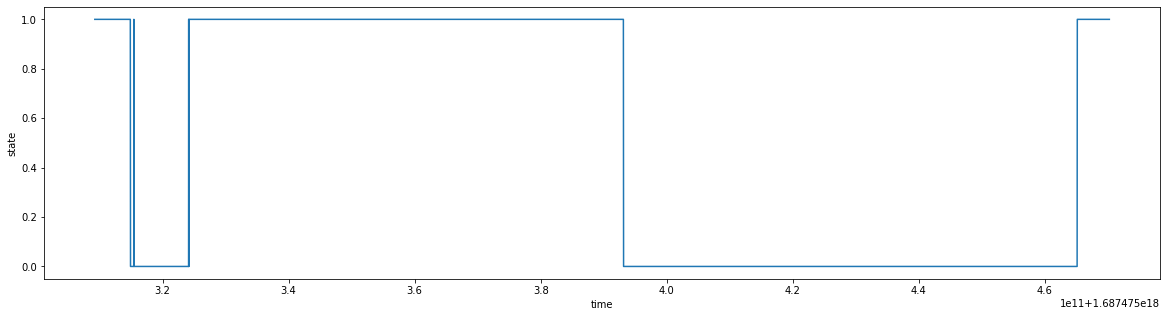

In [100]:
plt.figure(figsize=(20, 5))
plt.plot(time,state) 
plt.xlabel('time')
plt.ylabel('state')
plt.show()

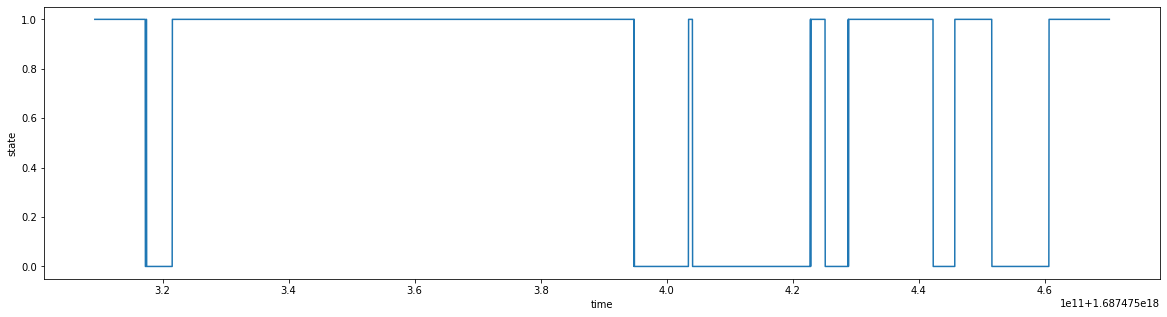

In [101]:
i=0
j=1
St=[]
S=[]
while (i<len(Sp)-1):
    if (Sp[i]<1):
        state[i]=0
    else:
        state[i]=1
    i+=1
plt.figure(figsize=(20, 5))
plt.plot(time,state) 
plt.xlabel('time')
plt.ylabel('state')
plt.show()

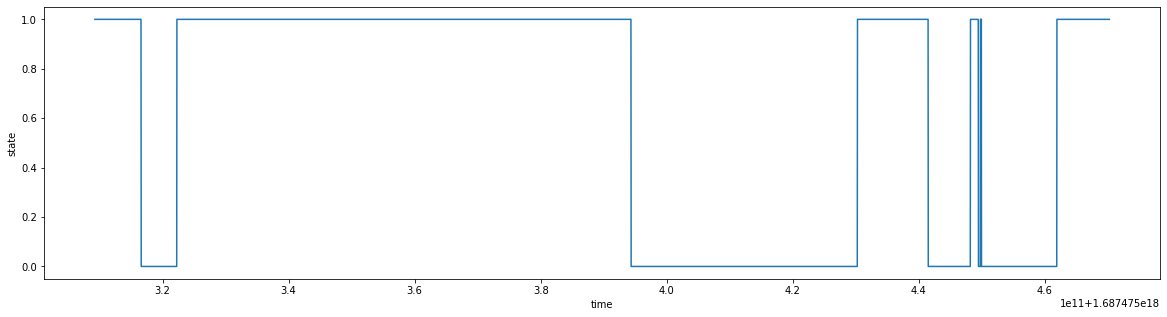

In [102]:
i=0
j=1
St=[]
S=[]
while (i<len(Sp)-1):
    if (Sp[i]<2):
        state[i]=0
    else:
        state[i]=1
    i+=1
plt.figure(figsize=(20, 5))
plt.plot(time,state) 
plt.xlabel('time')
plt.ylabel('state')
plt.show()

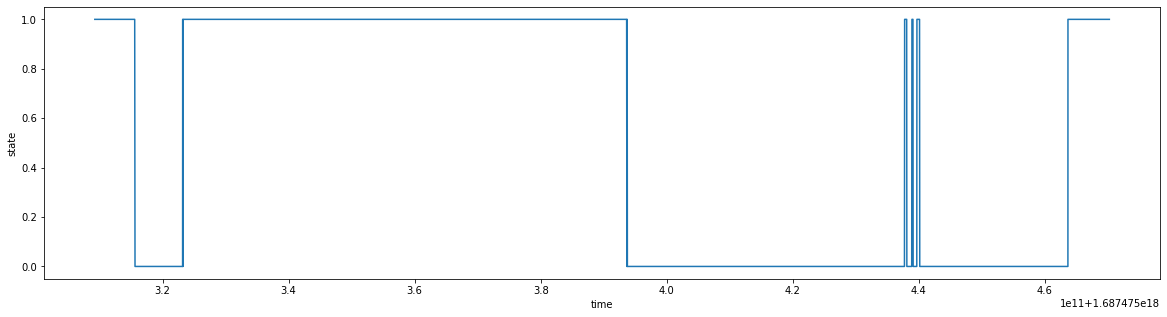

In [109]:
i=0
j=1
St=[]
S=[]
while (i<len(Sp)-1):
    if (Sp[i]<3.2):
        state[i]=0
    else:
        state[i]=1
    i+=1
plt.figure(figsize=(20, 5))
plt.plot(time,state) 
plt.xlabel('time')
plt.ylabel('state')
plt.show()

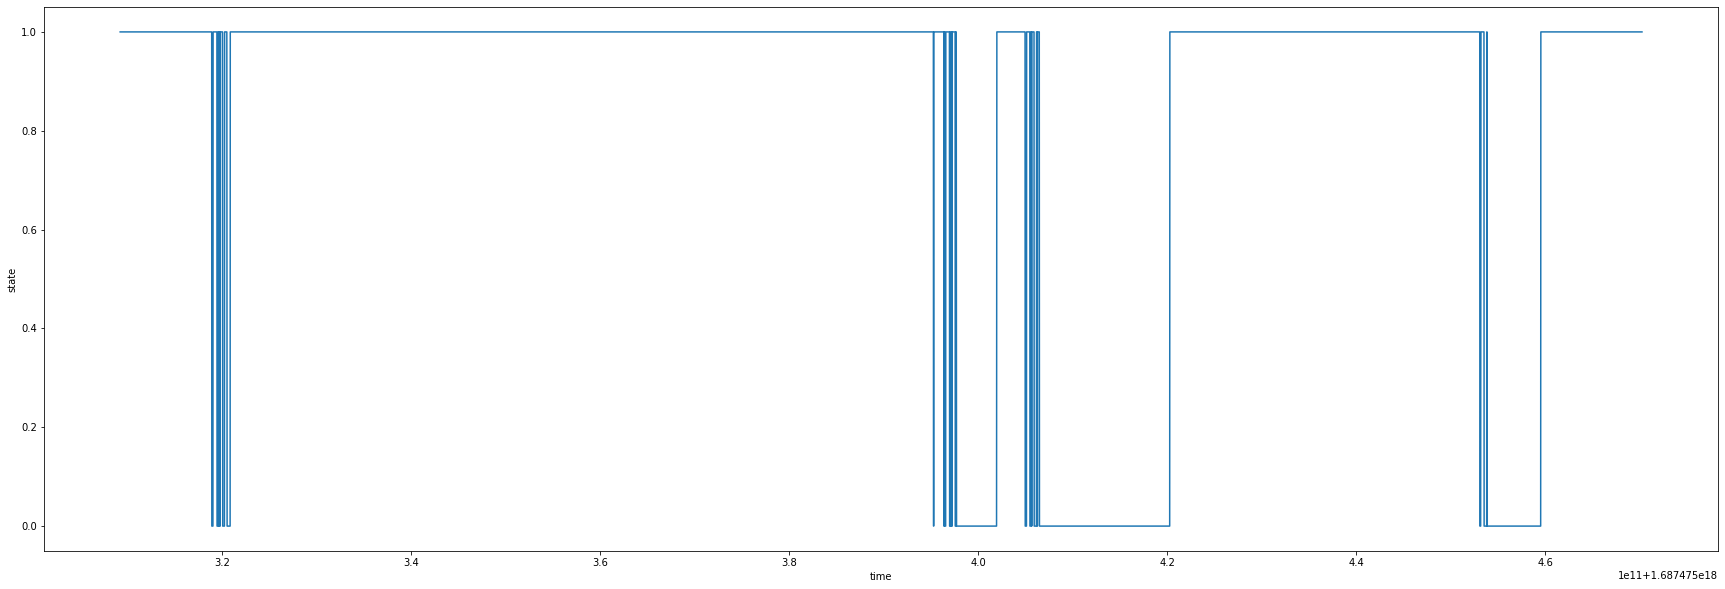

In [107]:
i=0
j=1
St=[]
S=[]
while (i<len(Sp)-1):
    if (Sp[i]<0.1):
        state[i]=0
    else:
        state[i]=1
    i+=1
plt.figure(figsize=(30, 10))
plt.plot(time,state) 
plt.xlabel('time')
plt.ylabel('state')
plt.show()

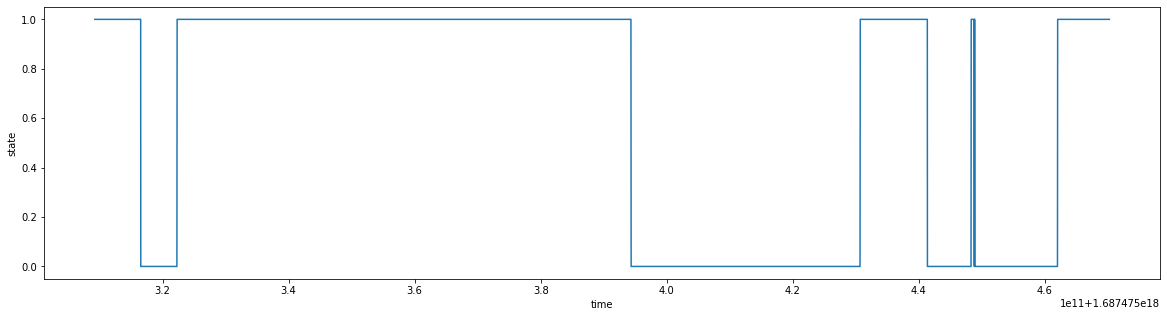

In [108]:
i=0
j=1
St=[]
S=[]
while (i<len(Sp)-1):
    if (Sp[i]<2.1):
        state[i]=0
    else:
        state[i]=1
    i+=1
plt.figure(figsize=(20, 5))
plt.plot(time,state) 
plt.xlabel('time')
plt.ylabel('state')
plt.show()

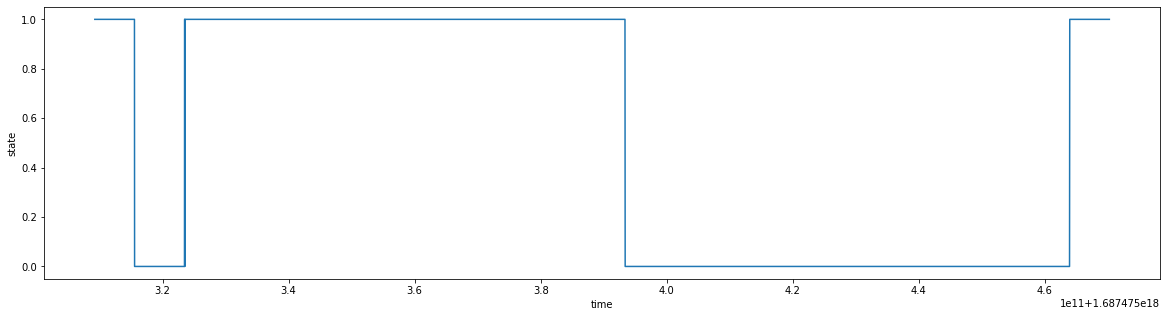

In [110]:
i=0
j=1
St=[]
S=[]
while (i<len(Sp)-1):
    if (Sp[i]<3.5):
        state[i]=0
    else:
        state[i]=1
    i+=1
plt.figure(figsize=(20, 5))
plt.plot(time,state) 
plt.xlabel('time')
plt.ylabel('state')
plt.show()

In [121]:
i=0
j=1
ts=[]
St=[]
S=[]
while (i<len(Sp)-1):
    if (Sp[i]<2.1) and (Sp[i]>0):
        state[i]=0
    else:
        state[i]=1
    i+=1
i=0
stops=0
while (i<len(Sp)-1):
    if (state[i]==1) and (state[j]==0):
        St.append(T[j])
        t=T[j]
        stops+=1
    if (state[i]==0) and (state[j]==1):
        f=T[j]-t
        ts.append(f)
    i+=1
    j+=1
print(St)
print(ts)

[1687475316543350992, 1687475394342707353, 1687475441375608734, 1687475448794490394, 1687475448906581560]
[5751178680, 36363721136, 6933606843, 50751956, 13119775993]


In [ ]:
#Алгоритм, для поиска порога по скорости когда неизвестно точное положение остановки

2.075149691427629


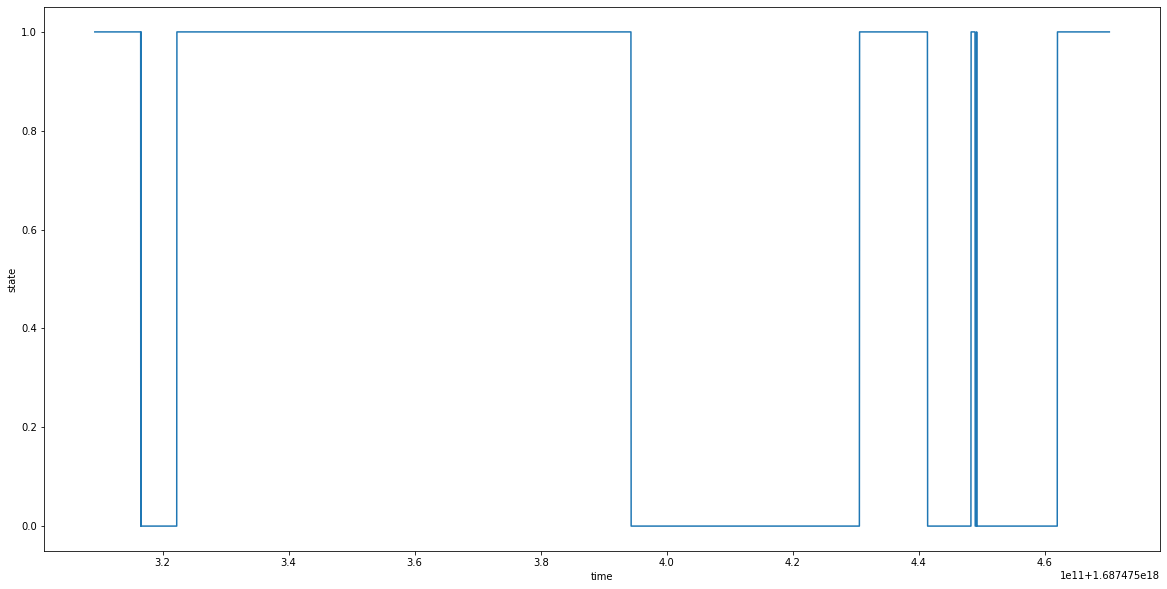

In [167]:
min=Sp[0]
max=Sp[0]
mean=0
i=0
while (i<len(Sp)-1):
    if (Sp[i]<min):
        min=Sp[i]
    if (Sp[i]>max):
        max=Sp[i]
    mean+=Sp[i]
    i+=1
mean=mean/len(Sp)
m=(max-min)/mean
print(m)
i=0
j=1
St=[]
S=[]
while (i<len(Sp)-1):
    if (Sp[i]<m):
        state[i]=0
    else:
        state[i]=1
    i+=1
plt.figure(figsize=(20, 10))
plt.plot(time,state) 
plt.xlabel('time')
plt.ylabel('state')
plt.show()

In [8]:
speed=data['field.speed']
time=data['%time']

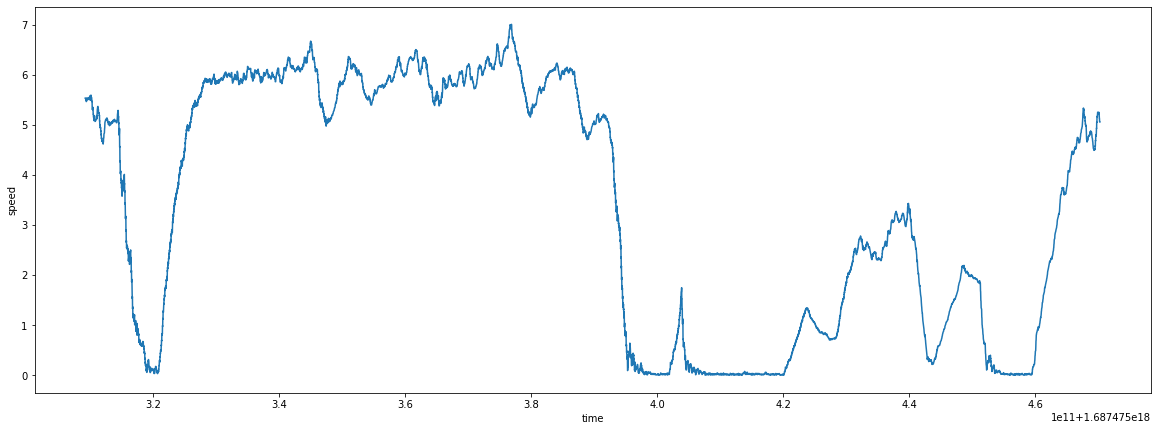

In [9]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(20, 7.1))
plt.plot(time,speed) 
plt.xlabel('time')
plt.ylabel('speed')
plt.show()

In [10]:
import csv
a=[[Sp],[T]]
with open("st.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerow(a)